In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./Assignment 7-Data Files/iris.csv')
def ECDF(x):
    n = len(x)
    x = np.sort(x)
    y = np.arange(1,n+1)/n
    return x,y

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\Training\Anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
No handles with labels found to put in legend.


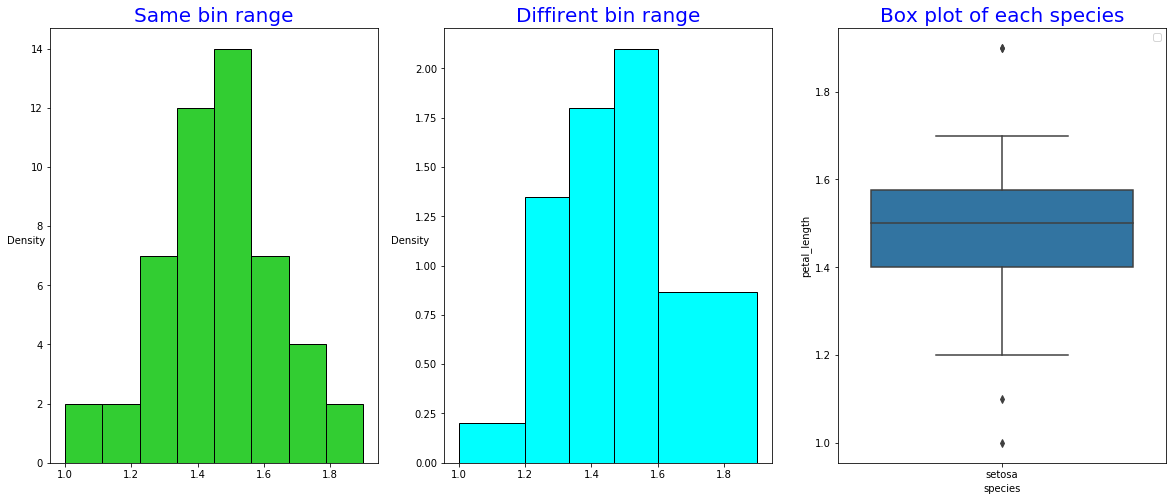

In [15]:
#ex1

fig, ax = plt.subplots(1,3,figsize=(20,8))
binSame = list(np.linspace(1,1.9,9))
binDifferent = list(np.linspace(1,1.2,1)) + list(np.linspace(1.2,1.6,4)) + list(np.linspace(1.6,1.9,2))

setosa = df[df['species']=='setosa']
ax[0].hist(setosa['petal_length'], bins=binSame, color='#32CD32', edgecolor="#000000")
ax[0].set_title('Same bin range', fontsize=20, color='blue')
ax[0].set_ylabel('Density', fontsize=10, rotation=0)


ax[1].hist(setosa['petal_length'], bins=binDifferent, color='#00FFFF', edgecolor="#000000", density=True)
ax[1].set_title('Diffirent bin range', fontsize=20, color='blue')
ax[1].set_ylabel('Density', fontsize=10, rotation=0)

sns.boxplot(x='species', y='petal_length', data=setosa, ax=ax[2])
ax[2].set_title('Box plot of each species', fontsize=20, color='blue')
ax[2].legend()
plt.show()

C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


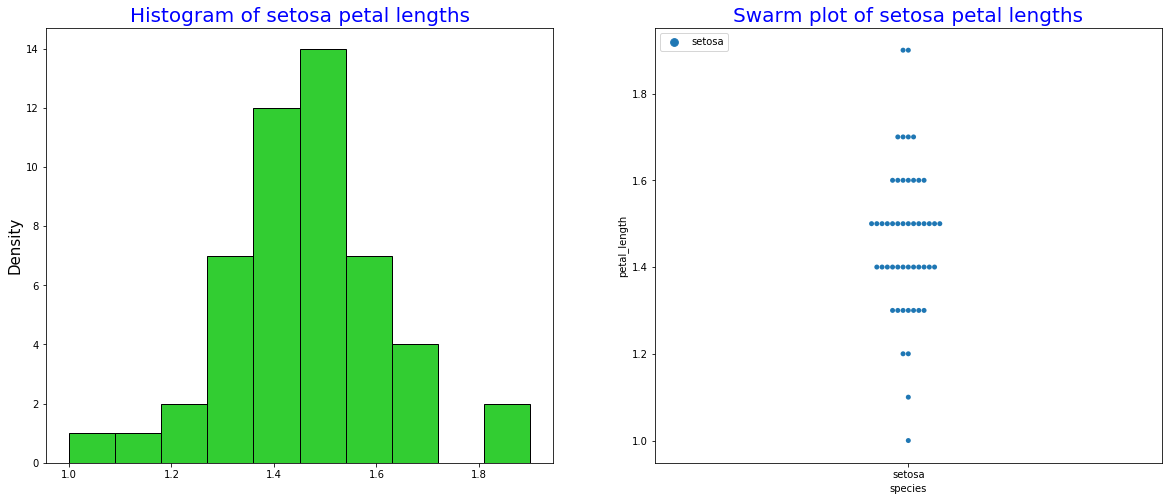

In [16]:
#ex2
fig, ax = plt.subplots(1,2,figsize=(20,8))

ax[0].hist(setosa['petal_length'], color='#32CD32', edgecolor="#000000")
ax[0].set_title('Histogram of setosa petal lengths', fontsize=20, color='blue')
ax[0].set_ylabel('Density', fontsize=15)

sns.swarmplot(x='species', y='petal_length', hue='species', data=setosa, ax=ax[1])
ax[1].set_title('Swarm plot of setosa petal lengths', fontsize=20, color='blue')
ax[1].legend(loc='upper left')
fig.show()

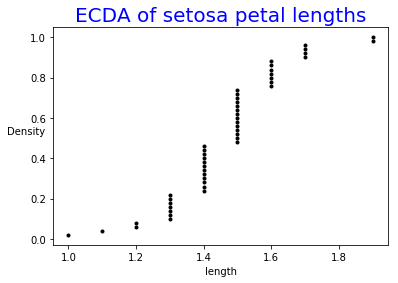

In [17]:
#ex3

setosa_petal_length = setosa['petal_length'].tolist()

plt.plot(ECDF(setosa_petal_length)[0], ECDF(setosa_petal_length)[1], marker='.', linestyle='none', c='#000000')
plt.title('ECDA of setosa petal lengths', fontsize=20, color='blue')
plt.xlabel('length', fontsize=10)
plt.ylabel('Density', fontsize=10, rotation=0)
plt.show()

C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


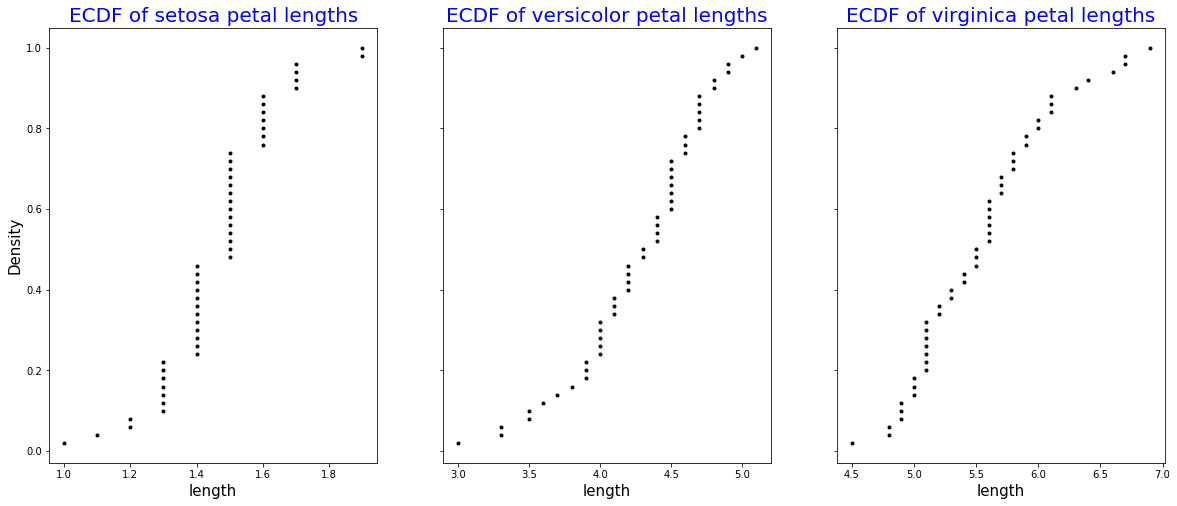

In [18]:
#ex4
ecdaSetose = df[df['species']=='setosa']['petal_length']
ecdaVersicolor = df[df['species']=='versicolor']['petal_length']
ecdaVirginica = df[df['species']=='virginica']['petal_length']

fig, ax = plt.subplots(1,3,figsize=(20,8), sharey=True)

ax[0].plot(ECDF(ecdaSetose)[0], ECDF(ecdaSetose)[1], marker='.', linestyle='none', c='#000000')
ax[0].set_title('ECDF of setosa petal lengths', fontsize=20, color='blue')
ax[0].set_xlabel('length', fontsize=15)
ax[0].set_ylabel('Density', fontsize=15)

ax[1].plot(ECDF(ecdaVersicolor)[0], ECDF(ecdaVersicolor)[1], marker='.', linestyle='none', c='#000000')
ax[1].set_title('ECDF of versicolor petal lengths', fontsize=20, color='blue')
ax[1].set_xlabel('length', fontsize=15)


ax[2].plot(ECDF(ecdaVirginica)[0], ECDF(ecdaVirginica)[1], marker='.', linestyle='none', c='#000000')
ax[2].set_title('ECDF of virginica petal lengths', fontsize=20, color='blue')
ax[2].set_xlabel('length', fontsize=15)

fig.show()

[1.5, 4.35, 5.55]


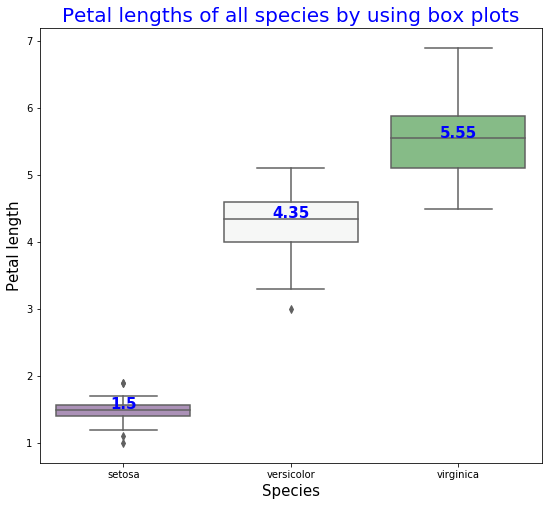

In [19]:
#ex5

median = df.groupby('species')['petal_length'].median().reset_index(name='Median patal length')
median_value = median['Median patal length'].tolist()
median_label = [str(i) for i in median['Median patal length']]
pos = range(len(median))
print(median_value)

plt.figure(figsize=(9,8))
ax = sns.boxplot(x="species", y="petal_length", data=df, palette="PRGn")
plt.title('Petal lengths of all species by using box plots', fontsize=20, color='blue')
plt.xlabel('Species', fontsize=15)
plt.ylabel('Petal length', fontsize=15)
for tick, label in zip(pos, ax.get_xticklabels()):
    plt.text(tick, median_value[tick] + 0.01, median_label[tick], horizontalalignment='center', color='b', weight='semibold', fontsize=15)
plt.show()

In [20]:
#ex6
setosaPercentile = np.percentile(ecdaSetose, [5,35,60,80,95])

print('5% of setosa petal lengths', setosaPercentile[0])
print('35% of setosa petal lengths', setosaPercentile[1])
print('60% of setosa petal lengths', setosaPercentile[2])
print('80% of setosa petal lengths', setosaPercentile[3])
print('95% of setosa petal lengths', setosaPercentile[4])

5% of setosa petal lengths 1.2
35% of setosa petal lengths 1.4
60% of setosa petal lengths 1.5
80% of setosa petal lengths 1.6
95% of setosa petal lengths 1.7


In [21]:
#ex7
setosaVar = np.var(ecdaSetose)
print('Var: ', setosaVar)

setosaStd = np.std(ecdaSetose)
print('Std: ', setosaStd)

Var:  0.02950400000000001
Std:  0.17176728442867115


In [22]:
#ex8
setosaLengths = setosa['petal_length']
setosaWidths = setosa['petal_width']
covariance = np.sum((setosaLengths-setosaLengths.mean())*(setosaWidths-setosaWidths.mean()))/setosaLengths.shape[0]

print('correlation coefficient of setosa petal lengths and petal widths: ', covariance)
#posive covariance


Pearsoncorrelation = covariance/(setosaLengths.std()*setosaWidths.std())
print('Pearson correlation coefficient of setosa petal lengths and petal widths: ', Pearsoncorrelation)

correlation coefficient of setosa petal lengths and petal widths:  0.005584000000000001
Pearson correlation coefficient of setosa petal lengths and petal widths:  0.30018204693487494


No handles with labels found to put in legend.


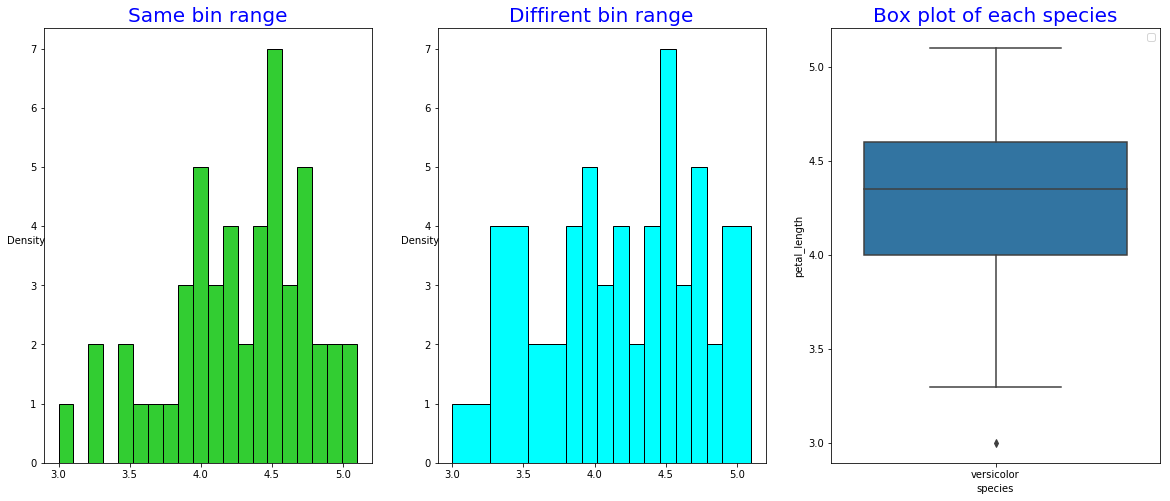

No handles with labels found to put in legend.


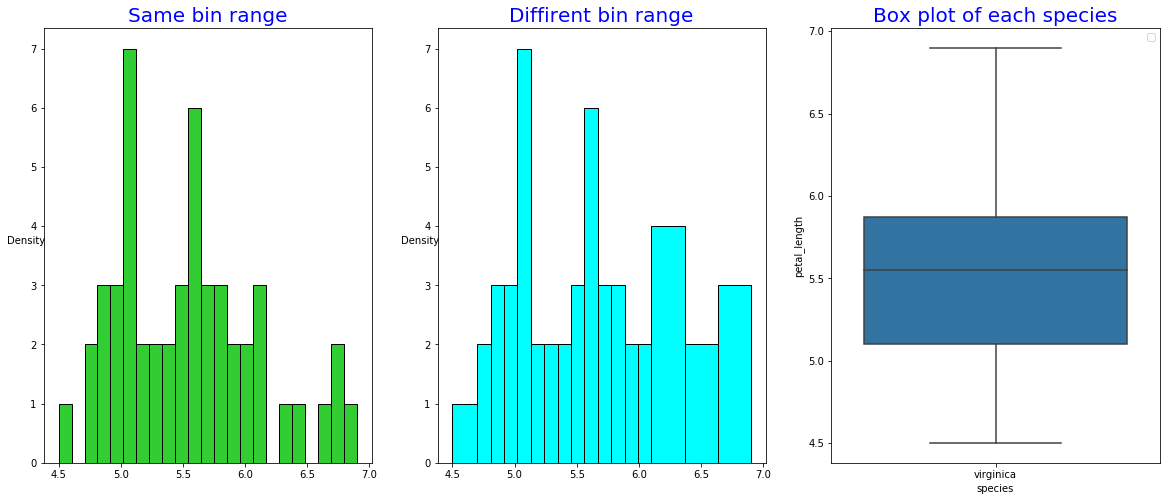

In [23]:
#Ex9

fig, ax = plt.subplots(1,3,figsize=(20,8))
binSame = list(np.linspace(3,5.1,21))
binDifferent = list(np.linspace(3,3.8,4)) + list(np.linspace(3.8,4.9,11)) + list(np.linspace(4.9,5.1,2))

versicolor = df[df['species']=='versicolor']
ax[0].hist(versicolor['petal_length'], bins=binSame, color='#32CD32', edgecolor="#000000")
ax[0].set_title('Same bin range', fontsize=20, color='blue')
ax[0].set_ylabel('Density', fontsize=10, rotation=0)


ax[1].hist(versicolor['petal_length'], bins=binDifferent, color='#00FFFF', edgecolor="#000000")
ax[1].set_title('Diffirent bin range', fontsize=20, color='blue')
ax[1].set_ylabel('Density', fontsize=10, rotation=0)

sns.boxplot(x='species', y='petal_length', data=versicolor, ax=ax[2])
ax[2].set_title('Box plot of each species', fontsize=20, color='blue')
ax[2].legend()
plt.show()



fig, ax = plt.subplots(1,3,figsize=(20,8))
binSame = list(np.linspace(4.5,6.9,24))
binDifferent = list(np.linspace(4.5,4.7,1)) + list(np.linspace(4.7,6.1,14)) + list(np.linspace(6.1,6.9,4))

virginica = df[df['species']=='virginica']
ax[0].hist(virginica['petal_length'], bins=binSame, color='#32CD32', edgecolor="#000000")
ax[0].set_title('Same bin range', fontsize=20, color='blue')
ax[0].set_ylabel('Density', fontsize=10, rotation=0)


ax[1].hist(virginica['petal_length'], bins=binDifferent, color='#00FFFF', edgecolor="#000000")
ax[1].set_title('Diffirent bin range', fontsize=20, color='blue')
ax[1].set_ylabel('Density', fontsize=10, rotation=0)

sns.boxplot(x='species', y='petal_length', data=virginica, ax=ax[2])
ax[2].set_title('Box plot of each species', fontsize=20, color='blue')
ax[2].legend()
plt.show()


C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


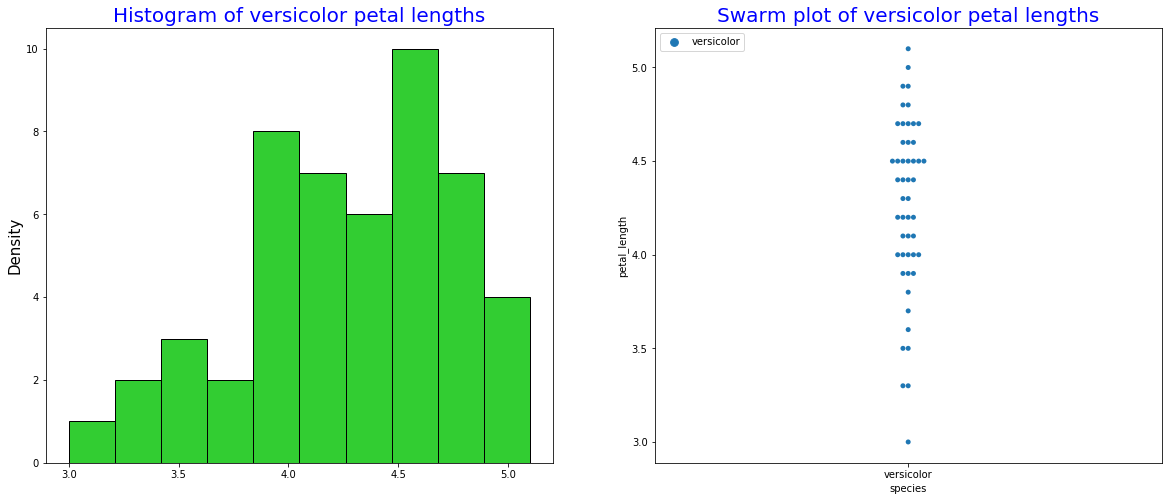

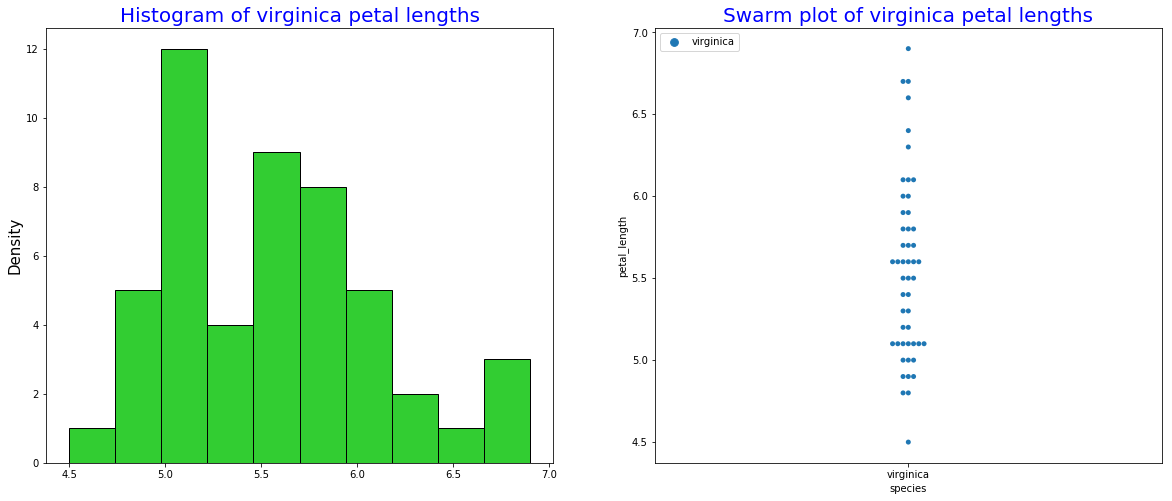

In [24]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

ax[0].hist(versicolor['petal_length'], color='#32CD32', edgecolor="#000000")
ax[0].set_title('Histogram of versicolor petal lengths', fontsize=20, color='blue')
ax[0].set_ylabel('Density', fontsize=15)

sns.swarmplot(x='species', y='petal_length', hue='species', data=versicolor, ax=ax[1])
ax[1].set_title('Swarm plot of versicolor petal lengths', fontsize=20, color='blue')
ax[1].legend(loc='upper left')
fig.show()


fig, ax = plt.subplots(1,2,figsize=(20,8))

ax[0].hist(virginica['petal_length'], color='#32CD32', edgecolor="#000000")
ax[0].set_title('Histogram of virginica petal lengths', fontsize=20, color='blue')
ax[0].set_ylabel('Density', fontsize=15)

sns.swarmplot(x='species', y='petal_length', hue='species', data=virginica, ax=ax[1])
ax[1].set_title('Swarm plot of virginica petal lengths', fontsize=20, color='blue')
ax[1].legend(loc='upper left')
fig.show()

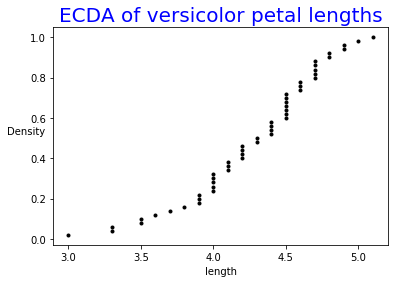

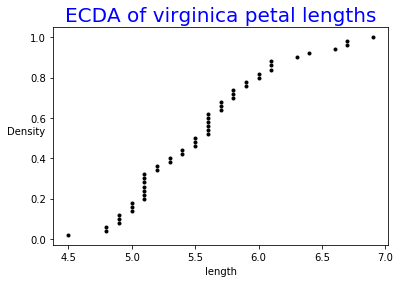

In [25]:
versicolor_petal_length = df[df['species']=='versicolor']['petal_length'].tolist()

plt.plot(ECDF(versicolor_petal_length)[0], ECDF(versicolor_petal_length)[1], marker='.', linestyle='none', c='#000000')
plt.title('ECDA of versicolor petal lengths', fontsize=20, color='blue')
plt.xlabel('length', fontsize=10)
plt.ylabel('Density', fontsize=10, rotation=0)
plt.show()

virginica_petal_length = df[df['species']=='virginica']['petal_length'].tolist()

plt.plot(ECDF(virginica_petal_length)[0], ECDF(virginica_petal_length)[1], marker='.', linestyle='none', c='#000000')
plt.title('ECDA of virginica petal lengths', fontsize=20, color='blue')
plt.xlabel('length', fontsize=10)
plt.ylabel('Density', fontsize=10, rotation=0)
plt.show()

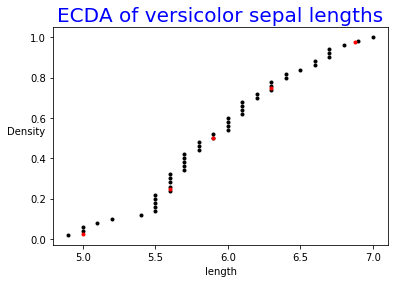

In [42]:
#ex10
versicolor_sepal_length = df[df['species']=='versicolor']['sepal_length'].tolist()
versicolorPer = np.percentile(versicolor_sepal_length, [2.5,25,50,75,97.5])
versicolor = ECDF(versicolor_sepal_length)

dataFrame = pd.DataFrame({'Length': versicolorPer, 'Density': [0.025, 0.25, 0.5, 0.75, 0.975]})

red = dataFrame[dataFrame['Density'].isin([0.025, 0.25, 0.5, 0.75, 0.975])]


plt.plot(versicolor[0], versicolor[1], marker='.', linestyle='none', c='#000000')
plt.plot(red['Length'], red['Density'], marker='.', linestyle='none', c='r')
plt.title('ECDA of versicolor sepal lengths', fontsize=20, color='blue')
plt.xlabel('length', fontsize=10)
plt.ylabel('Density', fontsize=10, rotation=0)
plt.show()

2.8
0.52


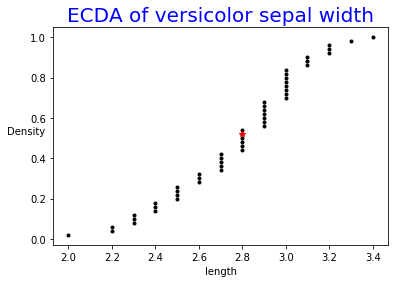

In [71]:
#11
versicolor_sepal_width = df[df['species']=='versicolor']['sepal_width'].tolist()
versicolorMedian = np.median(versicolor_sepal_width)

print(versicolorMedian)
versicolor = ECDF(versicolor_sepal_width)
index_ = int(len(versicolor[1])/2)

dataFrame = pd.DataFrame({'Length': versicolor[0], 'Density': versicolor[1]})



plt.plot(versicolor[0], versicolor[1], marker='.', linestyle='none', c='#000000')
plt.plot(versicolorMedian, versicolor[1][index_], marker='*', linestyle='none', c='r')
plt.title('ECDA of versicolor sepal width', fontsize=20, color='blue')
plt.xlabel('length', fontsize=10)
plt.ylabel('Density', fontsize=10, rotation=0)
plt.show()

   versicolor_petal_width  ECDF
0                     1.0  0.02
1                     1.0  0.04
2                     1.0  0.06
3                     1.0  0.08
4                     1.0  0.10


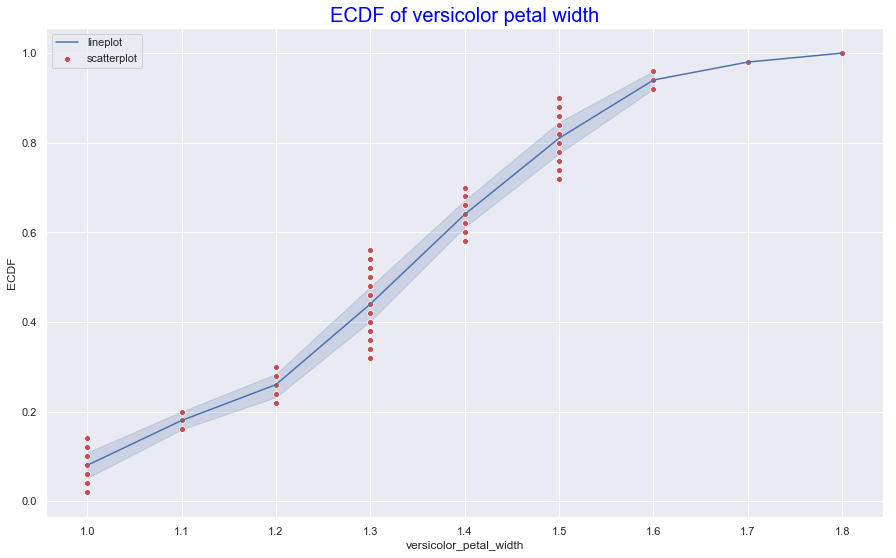

In [72]:
#Ex12
VersicolorPetal0 = df[df['species']=='versicolor'][['species', 'petal_width']]
VersicolorPetal = pd.DataFrame()
VersicolorPetal['versicolor_petal_width'] = ECDF(VersicolorPetal0['petal_width'])[0]
VersicolorPetal['ECDF'] = ECDF(VersicolorPetal0['petal_width'])[1]
print(VersicolorPetal.head())

plt.figure(figsize=(15,9))
sns.set(style='darkgrid')
sns.lineplot(x='versicolor_petal_width', y='ECDF', data=VersicolorPetal, label='lineplot')
sns.scatterplot(x='versicolor_petal_width', y='ECDF', data=VersicolorPetal, color='r', label='scatterplot')
plt.title('ECDF of versicolor petal width', fontsize=20, color='blue')
plt.legend(loc='upper left')
plt.show()

5.552


C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


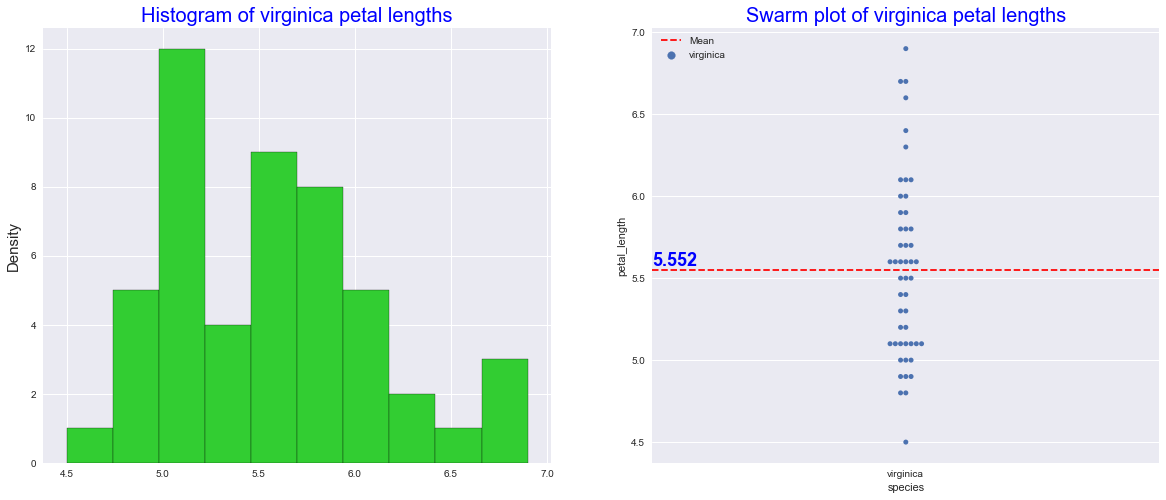

In [98]:
#ex13
virginica = df[df['species']=='virginica']
mean = virginica['petal_length'].mean()
print(mean)
fig, ax = plt.subplots(1,2,figsize=(20,8))


ax[0].hist(virginica['petal_length'], color='#32CD32', edgecolor="#000000")
ax[0].set_title('Histogram of virginica petal lengths', fontsize=20, color='blue')
ax[0].set_ylabel('Density', fontsize=15)

sns.swarmplot(x='species', y='petal_length', hue='species', data=virginica, ax=ax[1])
ax[1].axhline(mean, ls='--', label='Mean', color='r')

ax[1].text(-0.5, mean, "{:.3f}".format(mean), horizontalalignment='left', verticalalignment='bottom', fontweight='bold', fontsize=18, color='b')
ax[1].set_title('Swarm plot of virginica petal lengths', fontsize=20, color='blue')
ax[1].legend(loc='upper left')
fig.show()

3.7586666666666693
1.7644204199522617


C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


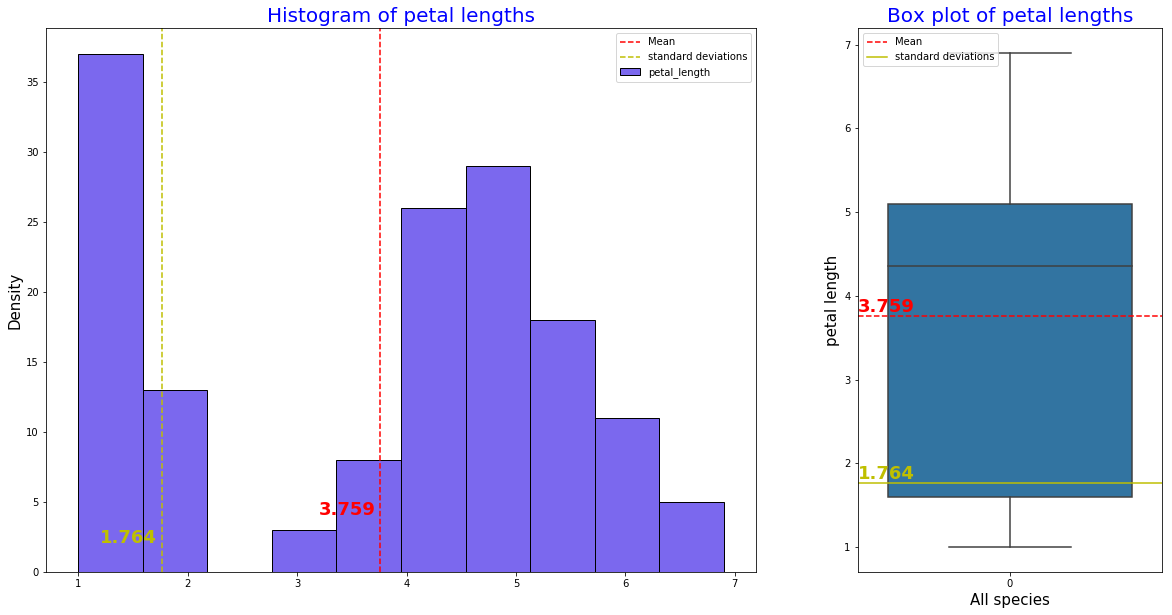

In [19]:
#EX14
petalLength = df['petal_length']
meanPetalLength = petalLength.mean()
stdPetalLength = petalLength.std()
print(meanPetalLength)
print(stdPetalLength)


fig, ax = plt.subplots(1,2,figsize=(20,10), gridspec_kw = {'width_ratios':[7, 3]})


ax[0].hist(petalLength, color='#7B68EE', edgecolor="#000000")
ax[0].set_title('Histogram of petal lengths', fontsize=20, color='blue')
ax[0].set_ylabel('Density', fontsize=15)

ax[0].axvline(meanPetalLength, ls='--', label='Mean', color='r')
ax[0].text(3.2, meanPetalLength, "{:.3f}".format(meanPetalLength), horizontalalignment='left', verticalalignment='bottom', fontweight='bold', fontsize=18, color='r')

ax[0].axvline(stdPetalLength, ls='--', label='standard deviations', color='y')
ax[0].text(1.2, stdPetalLength, "{:.3f}".format(stdPetalLength), horizontalalignment='left', verticalalignment='bottom', fontweight='bold', fontsize=18, color='y')

ax[0].legend(loc='upper right')

sns.boxplot(data=petalLength, ax=ax[1])
ax[1].set_xlabel('All species', fontsize=15)
ax[1].set_ylabel('petal length', fontsize=15)

ax[1].axhline(meanPetalLength, ls='--', label='Mean', color='r')
ax[1].text(-0.5, meanPetalLength, "{:.3f}".format(meanPetalLength), horizontalalignment='left', verticalalignment='bottom', fontweight='bold', fontsize=18, color='r')

ax[1].axhline(stdPetalLength, ls='-', label='standard deviations', color='y')
ax[1].text(-0.5, stdPetalLength, "{:.3f}".format(stdPetalLength), horizontalalignment='left', verticalalignment='bottom', fontweight='bold', fontsize=18, color='y')

ax[1].set_title('Box plot of petal lengths', fontsize=20, color='blue')
# ax[1].set(xlim=(90,100))
ax[1].legend(loc='upper left')
fig.show()

count    14092.000000
mean         4.816577
std          0.380344
min          3.300000
25%          4.600000
50%          4.800000
75%          5.100000
max          6.300000
Name: mag, dtype: float64
25%:  4.6
75%:  5.1


C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "right left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


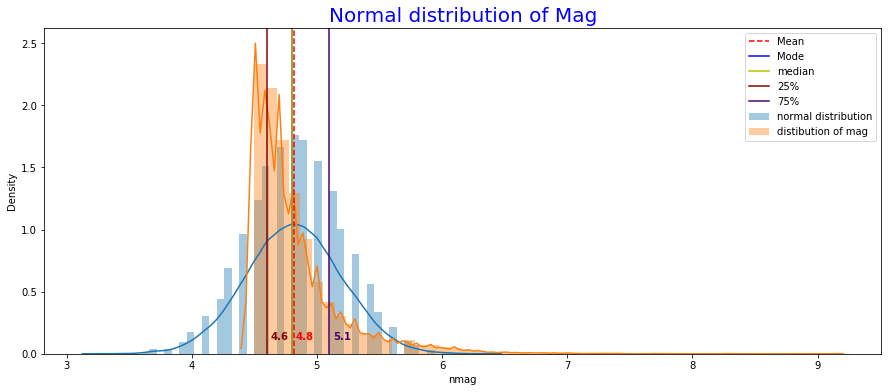

mean:  4.816576781152444 median:  4.8 mode : 4.8


In [148]:
#EX16


np.random.seed(42)
df = pd.read_csv('./Assignment 7-Data Files/Japan earthquakes 2001 - 2018.csv')
df['nmag'] = df['mag']
mag_mean = df['mag'].mean()
mag_std = df['mag'].std()
mag_min = df['mag'].min()
mag_max = df['mag'].max()

plt.figure(figsize=(15,6))
df['mag'] = np.random.normal(mag_mean, mag_std, df.shape[0])
df['mag'] = df['mag'].map(lambda x:round(x, 1))

mean = df['mag'].mean()
mode = df['mag'].mode()[0]
median = df['mag'].median()
print(df['mag'].describe())

Q1, Q3 = np.percentile(df['mag'], [25,75])
print('25%: ', Q1)
print('75%: ', Q3)

sns.distplot(df['mag'], label='normal distribution', norm_hist=True)
plt.ylabel('Density')
sns.distplot(df['nmag'], label='distibution of mag', norm_hist=True)
plt.title('Normal distribution of Mag', color='b', fontsize=20)
plt.axvline(mean, ls='--', label='Mean', color='r')
plt.axvline(mode, ls='-', label='Mode', color='b')
plt.axvline(median, label='median', color='y')

plt.axvline(Q1, label='25%', color='#840000')
plt.text(4.63, 0.1, "{:.1f}".format(Q1), horizontalalignment='left', verticalalignment='bottom', fontweight='bold', fontsize=10, color='#840000')

plt.axvline(Q3, label='75%', color='#4b006e')
plt.text(5.13, 0.1, "{:.1f}".format(Q3), horizontalalignment='left', verticalalignment='bottom', fontweight='bold', fontsize=10, color='#4b006e')

plt.legend(loc='right left')
plt.text(4.83, 0.1, "{:.1f}".format(mode), horizontalalignment='left', verticalalignment='bottom', fontweight='bold', fontsize=10, color='r')

plt.show()


print('mean: ', mean, 'median: ', median, 'mode :', mode)

No handles with labels found to put in legend.
C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
No handles with labels found to put in legend.
C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


nmean:  4.817045131989661 nmedian:  4.5 nmode : 4.7


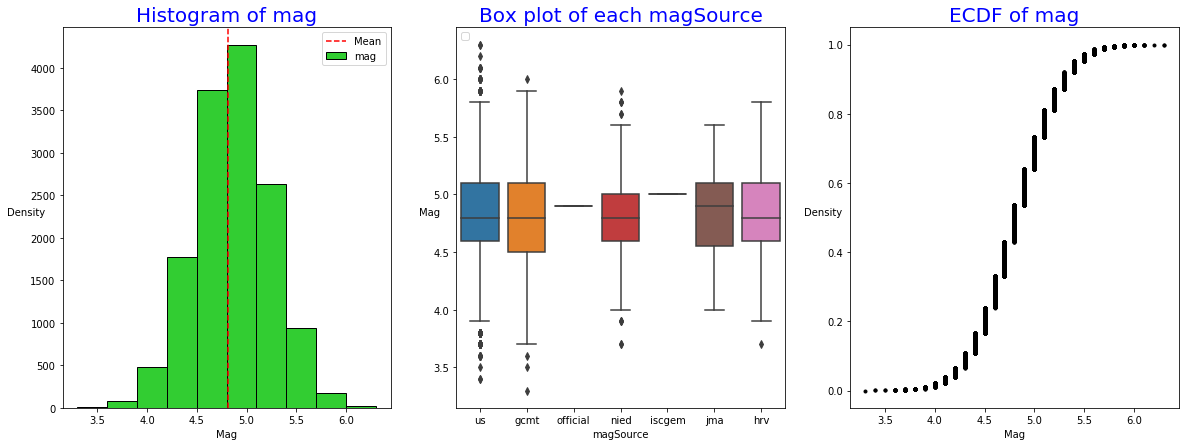

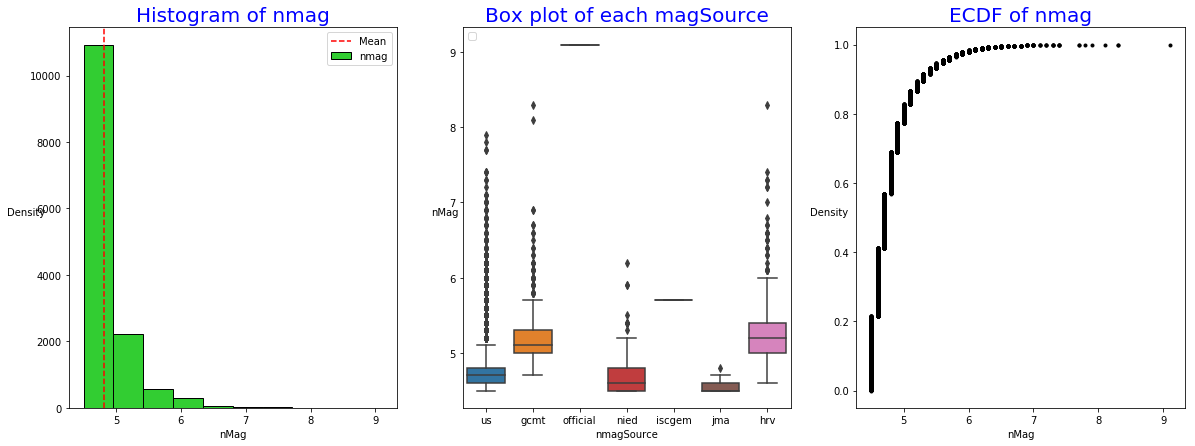

In [154]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

ax[0].hist(df['mag'], color='#32CD32', edgecolor="#000000")
ax[0].set_title('Histogram of mag', fontsize=20, color='blue')
ax[0].set_xlabel('Mag', fontsize=10)
ax[0].set_ylabel('Density', fontsize=10, rotation=0)
ax[0].axvline(mean, ls='--', label='Mean', color='r')
ax[0].legend(loc='upper right')

sns.boxplot(x='magSource', y='mag', data=df, ax=ax[1])
ax[1].set_title('Box plot of each magSource', fontsize=20, color='blue')
ax[1].set_xlabel('magSource', fontsize=10)
ax[1].set_ylabel('Mag', fontsize=10, rotation=0)
ax[1].legend(loc='upper left')

ax[2].plot(ECDF(df['mag'])[0], ECDF(df['mag'])[1], marker='.', linestyle='none', c='#000000')
ax[2].set_title('ECDF of mag', fontsize=20, color='blue')
ax[2].set_xlabel('Mag', fontsize=10)
ax[2].set_ylabel('Density', fontsize=10, rotation=0)

fig.show()


fig, ax = plt.subplots(1,3,figsize=(20,7))

ax[0].hist(df['nmag'], color='#32CD32', edgecolor="#000000")
ax[0].set_title('Histogram of nmag', fontsize=20, color='blue')
ax[0].set_xlabel('nMag', fontsize=10)
ax[0].set_ylabel('Density', fontsize=10, rotation=0)
ax[0].axvline(mean, ls='--', label='Mean', color='r')
ax[0].legend(loc='upper right')

sns.boxplot(x='magSource', y='nmag', data=df, ax=ax[1])
ax[1].set_title('Box plot of each magSource', fontsize=20, color='blue')
ax[1].set_xlabel('nmagSource', fontsize=10)
ax[1].set_ylabel('nMag', fontsize=10, rotation=0)
ax[1].legend(loc='upper left')

ax[2].plot(ECDF(df['nmag'])[0], ECDF(df['nmag'])[1], marker='.', linestyle='none', c='#000000')
ax[2].set_title('ECDF of nmag', fontsize=20, color='blue')
ax[2].set_xlabel('nMag', fontsize=10)
ax[2].set_ylabel('Density', fontsize=10, rotation=0)

fig.show()

meanNmag = df['nmag'].mean()
modeNmag = df['nmag'].mode()[0]
medianNmag = df['nmag'].median()

print('nmean: ', meanNmag, 'nmedian: ', modeNmag, 'nmode :', medianNmag)

In [150]:
def Outlier(Q1, Q3, k):
    return [Q1 - k*(Q3-Q1), Q3 + k*(Q3-Q1)]

outlier = Outlier(Q1, Q3, 1.5)
print(outlier)
farlier = Outlier(Q1, Q3, 3.0)
print(farlier)


[3.8499999999999996, 5.85]
[3.0999999999999996, 6.6]


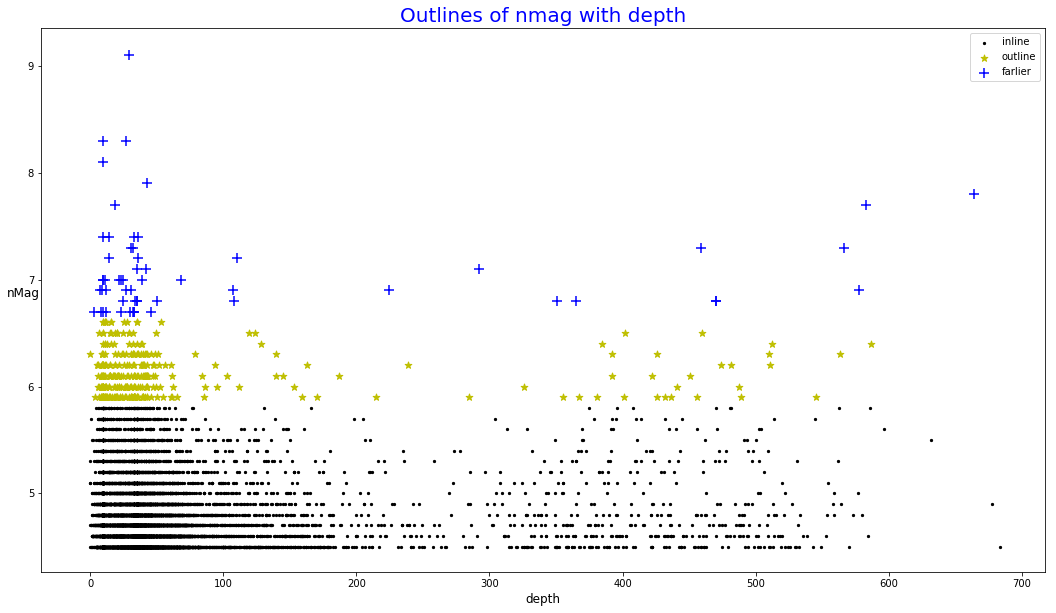

In [153]:
def Outlier_(x, outlier, farlier):
    if x < farlier[0] or x > farlier[1]:
        point = 2
    elif x >= outlier[0] and x <= outlier[1]:
        point = 0
    else:
        point = 1
    return point

df['magfix'] = df['nmag'].transform(lambda x:Outlier_(x, outlier, farlier))
# print(df)

plt.subplots(figsize=(18,10))
plt.scatter(df[df['magfix']==0]['depth'], df[df['magfix']==0]['nmag'], marker='.', c='k', label='inline', s=20)
plt.scatter(df[df['magfix']==1]['depth'], df[df['magfix']==1]['nmag'], marker='*', c='y', label='outline', s=50)
plt.scatter(df[df['magfix']==2]['depth'], df[df['magfix']==2]['nmag'], marker='+', c='b', label='farlier', s=100)
plt.title('Outlines of nmag with depth', fontsize=20, color='blue')
plt.xlabel('depth', fontsize=12)
plt.ylabel('nMag', fontsize=12, rotation=0)
plt.legend(loc='best')
plt.show()

In [2]:
#Ex19
df = pd.read_csv('./Assignment 7-Data Files/UK_Traffic_Accidents_2015.csv', parse_dates=['Date'])

print(df['Local_Authority_(Highway)'].value_counts())



C:\Users\Training\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


E10000016    4222
E10000030    3858
E10000012    3009
E08000025    2970
E10000017    2940
E10000014    2865
E10000015    2510
E10000019    2134
E10000032    2056
E10000028    2020
E08000035    1979
E10000024    1794
E10000020    1749
E10000008    1727
E10000025    1623
E10000023    1613
E09000033    1578
E10000007    1564
E10000031    1504
E10000029    1486
E10000011    1466
E10000003    1410
E10000021    1323
E10000018    1311
E10000006    1293
E08000032    1235
E06000052    1228
E09000022    1226
S12000043    1198
E08000019    1138
             ... 
S12000030     197
S12000028     192
S12000019     190
S12000021     190
E06000003     190
W06000018     189
W06000014     181
E08000002     179
W06000008     177
S12000010     158
S12000041     144
E06000001     136
S12000042     131
W06000021     126
S12000039     118
S12000018     109
W06000001     100
W06000024      99
S12000009      95
S12000011      94
E06000017      93
S12000020      82
W06000020      78
W06000019      64
S12000005 

In [3]:
local = df[df['Local_Authority_(Highway)']=='E10000016'].sort_values(['Date', 'Time'])[['Date', 'Time']].reset_index(drop=True)
local['final_time'] = pd.to_datetime((local['Date'].astype(str) + local['Time'].astype(str)), format='%Y-%m-%d%H:%M')
print(local)

           Date   Time          final_time
0    2015-01-01  00:20 2015-01-01 00:20:00
1    2015-01-01  00:40 2015-01-01 00:40:00
2    2015-01-01  00:50 2015-01-01 00:50:00
3    2015-01-01  02:27 2015-01-01 02:27:00
4    2015-01-01  03:00 2015-01-01 03:00:00
5    2015-01-01  14:28 2015-01-01 14:28:00
6    2015-01-01  18:40 2015-01-01 18:40:00
7    2015-01-01  21:14 2015-01-01 21:14:00
8    2015-01-01  22:00 2015-01-01 22:00:00
9    2015-01-02  02:46 2015-01-02 02:46:00
10   2015-01-02  13:00 2015-01-02 13:00:00
11   2015-01-02  15:10 2015-01-02 15:10:00
12   2015-01-02  18:09 2015-01-02 18:09:00
13   2015-01-02  20:30 2015-01-02 20:30:00
14   2015-01-02  22:35 2015-01-02 22:35:00
15   2015-01-03  10:08 2015-01-03 10:08:00
16   2015-01-03  15:00 2015-01-03 15:00:00
17   2015-01-03  15:05 2015-01-03 15:05:00
18   2015-01-03  17:00 2015-01-03 17:00:00
19   2015-01-03  18:50 2015-01-03 18:50:00
20   2015-01-03  20:13 2015-01-03 20:13:00
21   2015-01-04  08:35 2015-01-04 08:35:00
22   2015-0

In [4]:
countAccident = local.groupby('Date')['Time'].count().reset_index(name='Number of accident')


uniqueAccident = countAccident['Number of accident'].unique()
print(countAccident)

          Date  Number of accident
0   2015-01-01                   9
1   2015-01-02                   6
2   2015-01-03                   6
3   2015-01-04                  10
4   2015-01-05                   6
5   2015-01-06                   8
6   2015-01-07                  22
7   2015-01-08                  15
8   2015-01-09                   7
9   2015-01-10                  10
10  2015-01-11                  11
11  2015-01-12                  10
12  2015-01-13                  22
13  2015-01-14                  16
14  2015-01-15                  16
15  2015-01-16                  11
16  2015-01-17                  17
17  2015-01-18                   9
18  2015-01-19                  11
19  2015-01-20                  13
20  2015-01-21                  10
21  2015-01-22                   6
22  2015-01-23                  13
23  2015-01-24                  13
24  2015-01-25                   9
25  2015-01-26                   8
26  2015-01-27                  12
27  2015-01-28      

In [5]:
lambda_ = round(countAccident['Number of accident'].mean(),2)

print(countAccident.describe())
print('\nmean:', lambda_)



       Number of accident
count          365.000000
mean            11.567123
std              3.916577
min              2.000000
25%              9.000000
50%             11.000000
75%             14.000000
max             22.000000

mean: 11.57


[14  7 13 15  8  9 11 13  9 11  8 12 13  9 13  7  9  9 12 18  6  4 10 15
  9 15 14 15 10 16 10  9 14 16  7 14 15 12 10 17 11  8  9 15 17 10  8 11
  7 18 12 20 11  9 13  4 17  7 13  9 10 13 10 13 12 13 14 18 10  9 15 12
 17 10 16 13  8 13 12 13 14 10 13  6  9 22 15 12  8  9 13 17  9 16  8 18
 12  7 16 14 10 12 15 16 10 12 11  9  2 15  7 14 13 12 12 15 11 15 11  7
 12 13 19 12 11 10  4 11 11  8 10 13 10 12 13 18 10 11 18  8  6  6  5 16
 15  7  9 10 10 16 14 12 10 10 17 10 19 13  9 13  6  5 11 10 13  6 14 10
 10 15 11  7  4  7 14 20 21 13 11 12  4 11  9 11 12 14  9 13 19 13  4 10
 12 15 11 16 11 19  8 13  7 12 12 12 16  7 14 14  7 10 10 17 12 10 11 11
 13  5  7  7  8 17 13  8  8  8  7  8 12 13  5  8 10 13 11  3 12  6 12  9
  8 12 15  6 12 11  9 13 13  6  9  8  6  7 15  8 18 12 14 10 12  7  9  7
 12 10 10  9 14 11 10  7 18 12  8  8 13 10 10 11 11 14  9 10 17 13 13  7
  9 10  7  7 15  8 14 14  9 12  7 12 18 14 12 11 11 16 12  4 15 10 10 14
  8  7 11 17 12  7 12  8 12 15 12 10  7 10 13 14  9

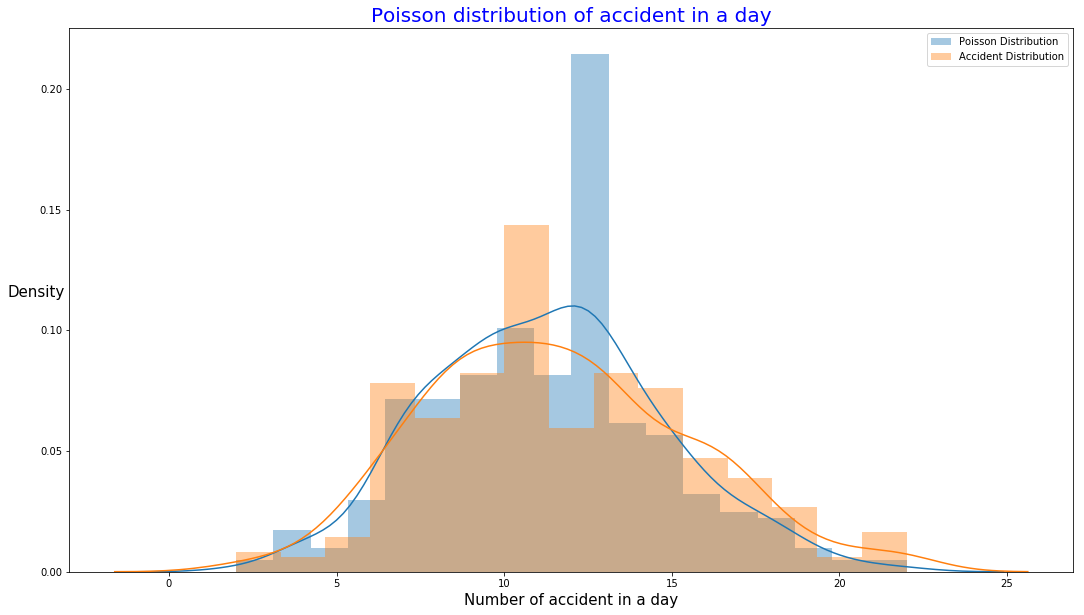

In [6]:
np.random.seed(42)
poissonDistribution = np.random.poisson(lambda_, countAccident.shape[0])

print(poissonDistribution)

plt.subplots(figsize=(18,10))
sns.distplot(poissonDistribution, label='Poisson Distribution')
sns.distplot(countAccident['Number of accident'], label='Accident Distribution')
plt.xlabel('Number of accident in a day', fontsize=15)
plt.ylabel('Density', fontsize=15, rotation = 0)
plt.title('Poisson distribution of accident in a day', color='b', fontsize=20)
plt.legend(loc='best')
plt.show()

In [7]:
def poisson(Lambda, k):
    k_mul = 1
    for i in range(1,k+1):
        k_mul *= i
    return np.exp((-1)*Lambda) * np.power(Lambda, k) / k_mul

DayA = poisson(lambda_, 20)*100
RealA = 100*countAccident[countAccident['Number of accident']==20].shape[0]/countAccident.shape[0]
print('Probability of 20 day have number accident:', DayA)
print('Real of 20 day have number accident:', RealA)

DayB = poisson(lambda_, 10)*100
RealB = 100*countAccident[countAccident['Number of accident']==10].shape[0]/countAccident.shape[0]
print('Probability of 10 day have number accident:', DayB)
print('Real of 10 day have number accident:', RealB)

Probability of 20 day have number accident: 0.7173901453090784
Real of 20 day have number accident: 0.821917808219178
Probability of 10 day have number accident: 11.18879716924473
Real of 10 day have number accident: 7.945205479452055


In [22]:
DayC = 0
RealC = 0
for i in range(1,16):
    DayC += poisson(lambda_, i)
    RealC += countAccident[countAccident['Number of accident']==i].shape[0]/countAccident.shape[0]
    
print('Probability less than 15 each day have number accident:{:.2f}%'.format(DayC*100))
print('Real less than 15 each day have number accident:{:.2f}%'.format(RealC*100))

Probability less than 15 each day have number accident:87.38%
Real less than 15 each day have number accident:81.92%


No handles with labels found to put in legend.
C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


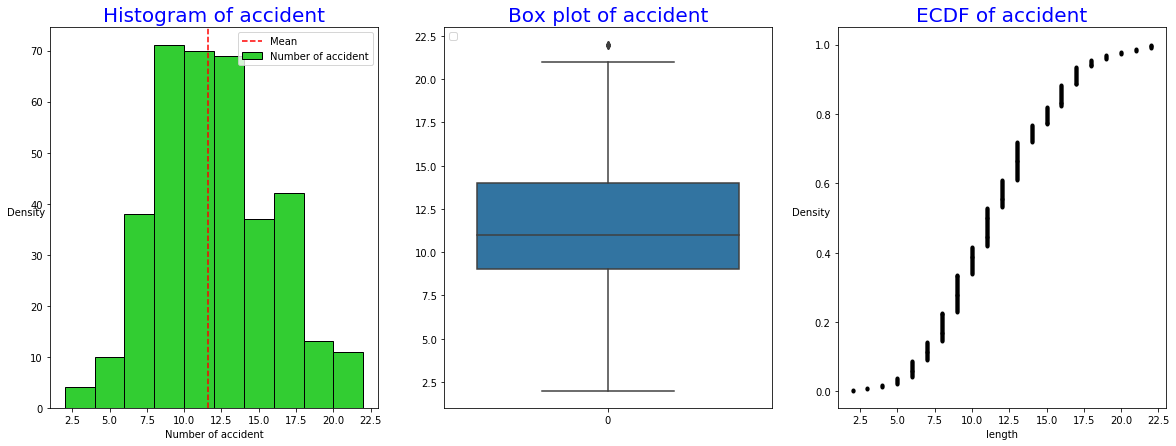

In [162]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

ax[0].hist(countAccident['Number of accident'], color='#32CD32', edgecolor="#000000")
ax[0].set_title('Histogram of accident', fontsize=20, color='blue')
ax[0].set_xlabel('Number of accident', fontsize=10)
ax[0].set_ylabel('Density', fontsize=10, rotation=0)
ax[0].axvline(lambda_, ls='--', label='Mean', color='r')
ax[0].legend(loc='upper right')

sns.boxplot(data=countAccident['Number of accident'], ax=ax[1])
ax[1].set_title('Box plot of accident', fontsize=20, color='blue')
ax[1].legend(loc='upper left')

ax[2].plot(ECDF(countAccident['Number of accident'])[0], ECDF(countAccident['Number of accident'])[1], marker='.', linestyle='none', c='#000000')
ax[2].set_title('ECDF of accident', fontsize=20, color='blue')
ax[2].set_xlabel('length', fontsize=10)
ax[2].set_ylabel('Density', fontsize=10, rotation=0)

fig.show()

In [166]:
Q1, Q3 = np.percentile(countAccident['Number of accident'], [25,75])
print(Q1, Q3)

def Outlier(Q1, Q3, k):
    return [Q1 - k*(Q3-Q1), Q3 + k*(Q3-Q1)]

outlier = Outlier(Q1, Q3, 1.5)
print(outlier)

farlier = Outlier(Q1, Q3, 3.0)
print(farlier)

def Outlier_(x, outlier, farlier):
    if x < farlier[0] or x > farlier[1]:
        point = 2
    elif x >= outlier[0] and x <= outlier[1]:
        point = 0
    else:
        point = 1
    return point

countAccident['outlier'] = countAccident['Number of accident'].transform(lambda x:Outlier_(x, outlier, farlier))
print(countAccident)
print(countAccident['outlier'].unique())

print()

9.0 14.0
[1.5, 21.5]
[-6.0, 29.0]
          Date  Number of accident  outlier
0   2015-01-01                   9        0
1   2015-01-02                   6        0
2   2015-01-03                   6        0
3   2015-01-04                  10        0
4   2015-01-05                   6        0
5   2015-01-06                   8        0
6   2015-01-07                  22        1
7   2015-01-08                  15        0
8   2015-01-09                   7        0
9   2015-01-10                  10        0
10  2015-01-11                  11        0
11  2015-01-12                  10        0
12  2015-01-13                  22        1
13  2015-01-14                  16        0
14  2015-01-15                  16        0
15  2015-01-16                  11        0
16  2015-01-17                  17        0
17  2015-01-18                   9        0
18  2015-01-19                  11        0
19  2015-01-20                  13        0
20  2015-01-21                  10        

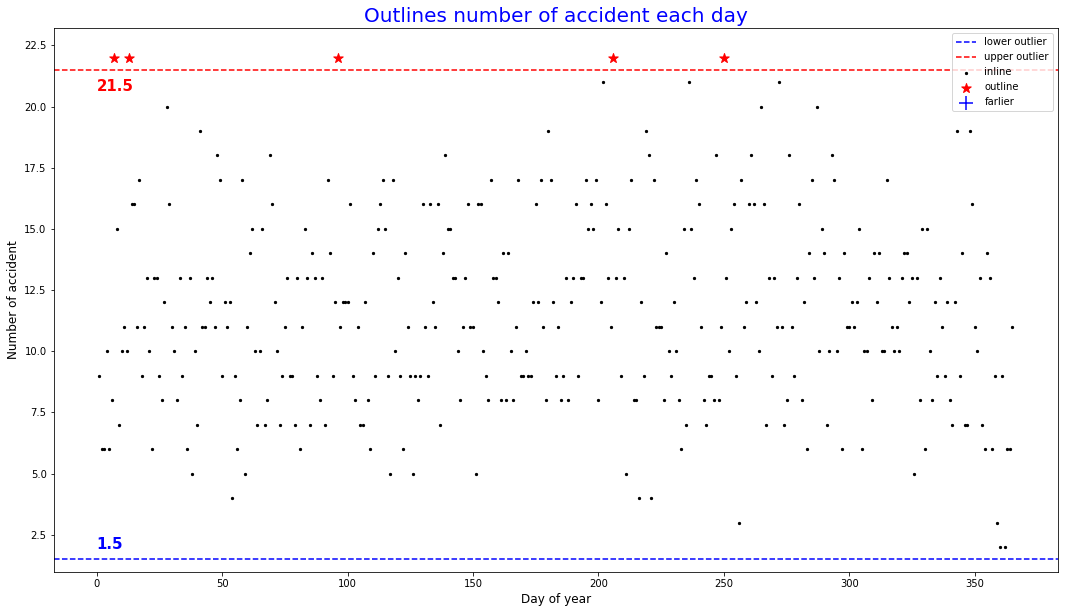

          Date  Number of accident  outlier
6   2015-01-07                  22        1
12  2015-01-13                  22        1
95  2015-04-06                  22        1
205 2015-07-25                  22        1
249 2015-09-07                  22        1

Ratio of outlier is 1.37%


In [199]:
plt.subplots(figsize=(18,10))
plt.scatter(countAccident[countAccident['outlier']==0]['Date'].dt.dayofyear, countAccident[countAccident['outlier']==0]['Number of accident'], marker='.', c='k', label='inline', s=20)
plt.scatter(countAccident[countAccident['outlier']==1]['Date'].dt.dayofyear, countAccident[countAccident['outlier']==1]['Number of accident'], marker='*', c='r', label='outline', s=100)
plt.scatter(countAccident[countAccident['outlier']==2]['Date'].dt.dayofyear, countAccident[countAccident['outlier']==2]['Number of accident'], marker='+', c='b', label='farlier', s=200)

plt.axhline(outlier[0], ls='--', label='lower outlier', color='b')
plt.text(0, 1.8, "{:.1f}".format(outlier[0]), horizontalalignment='left', verticalalignment='bottom', fontweight='bold', fontsize=15, color='b')

plt.axhline(outlier[1], ls='--', label='upper outlier', color='r')
plt.text(0, 20.5, "{:.1f}".format(outlier[1]), horizontalalignment='left', verticalalignment='bottom', fontweight='bold', fontsize=15, color='r')

plt.title('Outlines number of accident each day', fontsize=20, color='blue')
plt.xlabel('Day of year', fontsize=12)
plt.ylabel('Number of accident', fontsize=12)
plt.legend(loc='best')
plt.show()

outlierPoint = countAccident[countAccident['outlier']==1]
print(outlierPoint)
ratioOutlier = 100*outlierPoint.shape[0]/countAccident.shape[0]
print('\nRatio of outlier is {:.2f}%'.format(ratioOutlier))